Итоговая работа
=====================

Поздравляю вас, теперь вы вооружены знаниями по предобработке данных, и пора применить их на интересном кейсе.


Представлены данные такси, по которым мы должны предсказать возьмёт ли таксист заказ или нет(driver_response).


Принципы вы знаете, чек-лист аналогичен лабораторной работе.


Чек-лист:
1. Загрузите датасет taxi.csv.

2. Посмотрите на данные. Отобразите общую информацию по признакам (вспомните о describe и info). Напишите в markdown свои наблюдения.

3. Выявите пропуски, а также возможные причины их возникновения. Решите, что следует сделать с ними. Напишите в markdown свои наблюдения.

4. Оцените зависимости переменных между собой. Используйте корреляции. Будет хорошо, если воспользуетесь profile_report. Напишите в markdown свои наблюдения.

5. Определите стратегию преобразования категориальных признаков (т.е. как их сделать адекватными для моделей).

6. Найдите признаки, которые можно разделить на другие, или преобразовать в другой тип данных. Удалите лишние, при необходимости.

7. Разделите выборку на обучаемую и тестовую.

8. Обучите модель. Напишите в markdown свои наблюдения по полученным результатам. Хорошие результаты дают классификаторы RandomForest и XGBoost

Если возникнут затруднения, то смотрите на материал практических занятий. 
Данного там должно хватить для выполнения всех пунктов. Желаю успеха!

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import pandas_profiling

from matplotlib import pyplot as plt
from pandas_profiling import ProfileReport


In [73]:
# 1. Загрузите датасет taxi.csv.
data = pd.read_csv('taxi.csv')
data.head()

offer_gk  weekday_key  hour_key  driver_gk  order_gk  driver_latitude  \
0   1105373            5        20       6080    174182        55.818842   
1    759733            5        14       6080    358774        55.805342   
2    416977            6        14       6080    866260        55.813978   
3    889660            2         6       6080    163522        55.745922   
4   1120055            4        16       6080    506710        55.803578   

   driver_longitude  origin_order_latitude  origin_order_longitude  \
0         37.334562              55.814567               37.355010   
1         37.515023              55.819329               37.466398   
2         37.347688              55.814827               37.354074   
3         37.421748              55.743469               37.431130   
4         37.521602              55.812559               37.527407   

   distance_km  duration_min offer_class_group ride_type_desc  driver_response  
0       -1.000        -1.000           Economy        private                0  
1       18.802        25.217          Standard        private                1  
2        6.747         9.800           Economy        private                0  
3       -1.000        -1.000           Economy        private                1  
4       12.383        19.250           Economy        private                1

In [5]:
# 2. Посмотрите на данные. Отобразите общую информацию по признакам (вспомните о describe и info). 
#Напишите в markdown свои наблюдения.

In [6]:
data.shape

(100000, 14)

In [7]:
data.describe()

offer_gk    weekday_key       hour_key      driver_gk  \
count  1.000000e+05  100000.000000  100000.000000  100000.000000   
mean   5.662189e+05       3.159860      13.827790    3446.376360   
std    3.259360e+05       2.054222       7.306496    2038.738677   
min    4.000000e+00       0.000000       0.000000      14.000000   
25%    2.855552e+05       1.000000       8.000000    1421.000000   
50%    5.656715e+05       3.000000      16.000000    3506.500000   
75%    8.487198e+05       5.000000      20.000000    5242.000000   
max    1.130355e+06       6.000000      23.000000    6806.000000   

           order_gk  driver_latitude  driver_longitude  origin_order_latitude  \
count  100000.00000    100000.000000     100000.000000          100000.000000   
mean   460867.01291        55.700824         37.492292              55.772440   
std    266064.98953         2.135903          1.454640               0.665985   
min        18.00000        -1.000000         -1.000000              -1.000000   
25%    229178.50000        55.708651         37.413497              55.708032   
50%    462420.00000        55.772904         37.533664              55.772561   
75%    690894.00000        55.960667         37.624113              55.962000   
max    920344.00000        56.174097         38.280547              56.311121   

       origin_order_longitude    distance_km   duration_min  driver_response  
count           100000.000000  100000.000000  100000.000000    100000.000000  
mean                37.541637      18.393518      23.134841         0.492480  
std                  0.467758      41.129296      33.890105         0.499946  
min                 -1.000000      -1.000000      -1.000000         0.000000  
25%                 37.407117      -1.000000      -1.000000         0.000000  
50%                 37.532537      10.411500      19.700000         0.000000  
75%                 37.624358      30.665250      37.867000         1.000000  
max                 38.243608    5234.283000    3958.283000         1.000000

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   offer_gk                100000 non-null  int64  
 1   weekday_key             100000 non-null  int64  
 2   hour_key                100000 non-null  int64  
 3   driver_gk               100000 non-null  int64  
 4   order_gk                100000 non-null  int64  
 5   driver_latitude         100000 non-null  float64
 6   driver_longitude        100000 non-null  float64
 7   origin_order_latitude   100000 non-null  float64
 8   origin_order_longitude  100000 non-null  float64
 9   distance_km             100000 non-null  float64
 10  duration_min            100000 non-null  float64
 11  offer_class_group       100000 non-null  object 
 12  ride_type_desc          100000 non-null  object 
 13  driver_response         100000 non-null  int64  
dtypes: float64(6), int64(

In [11]:
data['weekday_key'].value_counts()

5    19284
6    15466
0    14411
4    13290
1    13089
2    12859
3    11601
Name: weekday_key, dtype: int64

In [12]:
data['hour_key'].value_counts()

23    8184
21    7398
22    6881
0     6646
20    6566
19    6369
18    5889
17    5028
16    4500
15    4249
14    3584
8     3550
1     3467
13    3355
9     3298
12    3169
11    2890
10    2840
7     2482
2     2275
4     2193
5     1809
3     1768
6     1610
Name: hour_key, dtype: int64

In [15]:
data['driver_response'].value_counts()

0    50752
1    49248
Name: driver_response, dtype: int64

In [18]:
data['offer_class_group'].value_counts()

Economy     48335
Standard    47288
Premium      1773
Delivery     1290
Kids          588
XL            464
VIP           225
VIP+           29
Test            8
Name: offer_class_group, dtype: int64

In [20]:
data['ride_type_desc'].value_counts()

private      91207
business      8533
affiliate      224
SMB             36
Name: ride_type_desc, dtype: int64

In [ ]:
data['ride_type_desc'].value_counts()

In [24]:
data0 = data[data['driver_response'] == 0]
data0.describe()

offer_gk   weekday_key      hour_key     driver_gk       order_gk  \
count  5.075200e+04  50752.000000  50752.000000  50752.000000   50752.000000   
mean   5.645635e+05      3.081731     13.687204   3414.790708  460431.188131   
std    3.256926e+05      2.103951      8.112672   2099.443709  266114.753451   
min    8.600000e+01      0.000000      0.000000     14.000000      50.000000   
25%    2.845065e+05      1.000000      6.000000   1421.000000  228345.250000   
50%    5.627950e+05      3.000000     17.000000   3399.000000  460973.000000   
75%    8.465470e+05      5.000000     21.000000   5269.000000  690834.000000   
max    1.130355e+06      6.000000     23.000000   6806.000000  920339.000000   

       driver_latitude  driver_longitude  origin_order_latitude  \
count     50752.000000      50752.000000           50752.000000   
mean         55.810123         37.520704              55.804834   
std           0.308845          0.241051               0.594173   
min           0.000000          0.000000              -1.000000   
25%          55.724363         37.412294              55.723759   
50%          55.878698         37.415752              55.885105   
75%          55.962069         37.604340              55.962322   
max          56.012142         38.151850              56.025061   

       origin_order_longitude   distance_km  duration_min  driver_response  
count            50752.000000  50752.000000  50752.000000          50752.0  
mean                37.517102     24.104886     28.096894              0.0  
std                  0.421773     34.665434     29.945238              0.0  
min                 -1.000000     -1.000000     -1.000000              0.0  
25%                 37.407117      2.290750      6.829000              0.0  
50%                 37.415485     19.148000     27.217000              0.0  
75%                 37.605329     42.179250     46.387250              0.0  
max                 38.131531   5234.283000   3958.283000              0.0

In [25]:
data1 = data[data['driver_response'] == 1]
data1.describe()

offer_gk   weekday_key      hour_key     driver_gk       order_gk  \
count  4.924800e+04  49248.000000  49248.000000  49248.000000   49248.000000   
mean   5.679249e+05      3.240375     13.972669   3478.926616  461316.147478   
std    3.261811e+05      1.998509      6.366666   1973.720276  266015.650834   
min    4.000000e+00      0.000000      0.000000     14.000000      18.000000   
25%    2.866602e+05      2.000000     10.000000   1793.000000  230218.500000   
50%    5.687790e+05      3.000000     15.000000   3511.000000  464790.500000   
75%    8.508700e+05      5.000000     19.000000   5148.000000  691052.750000   
max    1.130335e+06      6.000000     23.000000   6806.000000  920344.000000   

       driver_latitude  driver_longitude  origin_order_latitude  \
count     49248.000000      49248.000000           49248.000000   
mean         55.588188         37.463013              55.739057   
std           3.023291          2.057924               0.731168   
min          -1.000000         -1.000000              -1.000000   
25%          55.704054         37.487577              55.703359   
50%          55.753539         37.580233              55.753613   
75%          55.795378         37.635118              55.796249   
max          56.174097         38.280547              56.311121   

       origin_order_longitude   distance_km  duration_min  driver_response  
count            49248.000000  49248.000000  49248.000000          49248.0  
mean                37.566922     12.507728     18.021251              1.0  
std                  0.509605     46.133312     36.831391              0.0  
min                 -1.000000     -1.000000     -1.000000              1.0  
25%                 37.488029     -1.000000     -1.000000              1.0  
50%                 37.580320      6.310500     14.633000              1.0  
75%                 37.635275     17.156250     27.833000              1.0  
max                 38.243608   5215.793000   3947.383000              1.0

Исходя из указанных выше решений, можно сделать вывод о том, что данный датасет представляет собой данные
для анализа решений водителя принимать или не принимать заказ в зависимости от времени и дальности заказа.

Видно, что если средняя длина маршрута заказа 12.5 км, то водитель скорее примет заказ, но если время маршрута от 24 км, то водитель отказывается ехать к пассажиру.

Судя по указанным координатам и если я правильно использовао гугл карты, то это Москва или Красногорск.


In [17]:
#3. Выявите пропуски, а также возможные причины их возникновения. 
#Решите, что следует сделать с ними. Напишите в markdown свои наблюдения.

In [26]:
#4Оцените зависимости переменных между собой.
#Используйте корреляции. 
#Будет хорошо, если воспользуетесь profile_report. Напишите в markdown свои наблюдения.

Cудя по data.info() Выше все данные заполнены, и пропусков нет. Ничего с этим не делаем.

Profile report также не показывает пропущенных данных.

In [16]:
pandas_profiling.ProfileReport(data)


In [ ]:
#Построим матрицу корреляций

<AxesSubplot:>

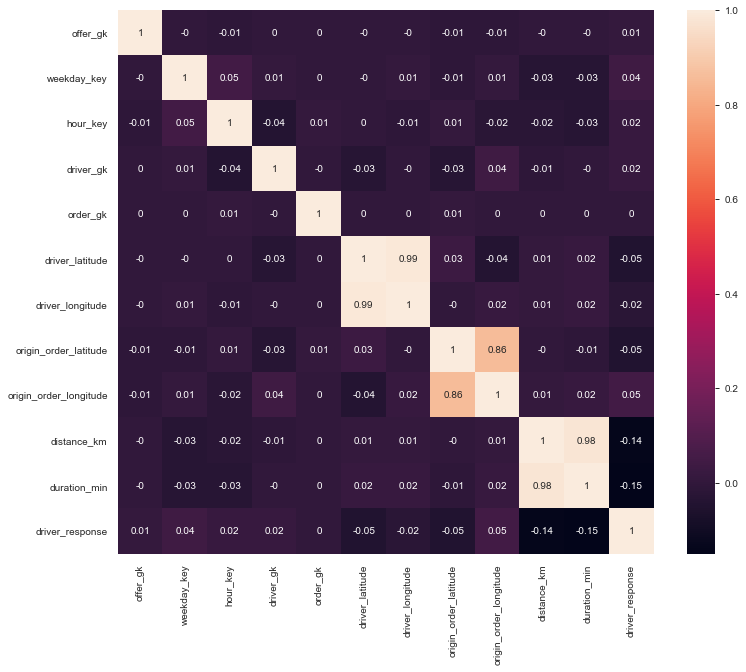

In [27]:
correlation_matrix = data.corr().round(2)
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(data=correlation_matrix, annot=True)

Из матрицы корреляций мы видим большую зависимость между долготой и широтой - это значит, что данные по заказам 
из одного города.


Также большая зависимость дистацнии заказа и времени маршрута.

По координатам, можем посчитать разницу между долготами и широтами нахождения водителя и пассажира, и использовать это как метрики расстояний. Вместо того чтобы использовать координаты по отдеьности. 

Возможно использование долготы и широты приведет к мультиколлинеарности данных, но пока оставим как есть

In [74]:
data['long_diff'] = data['driver_longitude'] - data['origin_order_longitude']
data['lat_diff'] = data['driver_latitude'] - data['origin_order_latitude']

pandas.core.frame.DataFrame

In [75]:
data2 = data.drop(['driver_longitude', 'driver_latitude', 'origin_order_longitude', 'origin_order_latitude' ], axis=1)


Показатели offer_gk и order_gk слишком много данных. Это номера заказов. Не думаю, что эти данные полезны для нас. 
Поэтому тоже дропаем их

In [77]:
data2.drop(['offer_gk', 'order_gk'], axis=1, inplace=True)
data2.head()

weekday_key  hour_key  driver_gk  distance_km  duration_min  \
0            5        20       6080       -1.000        -1.000   
1            5        14       6080       18.802        25.217   
2            6        14       6080        6.747         9.800   
3            2         6       6080       -1.000        -1.000   
4            4        16       6080       12.383        19.250   

  offer_class_group ride_type_desc  driver_response  long_diff  lat_diff  
0           Economy        private                0  -0.020448  0.004275  
1          Standard        private                1   0.048625 -0.013987  
2           Economy        private                0  -0.006386 -0.000849  
3           Economy        private                1  -0.009382  0.002453  
4           Economy        private                1  -0.005805 -0.008981

In [46]:
#5 Определите стратегию преобразования категориальных признаков (т.е. как их сделать адекватными для моделей).

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

label_enc = LabelEncoder()
oh_enc = OneHotEncoder()


In [79]:
offr_class = oh_enc.fit_transform(data2[['offer_class_group']]).toarray()
offr_class = pd.DataFrame(offr_class, columns=oh_enc.categories_[0])
offr_class.head(5)

Delivery  Economy  Kids  Premium  Standard  Test  VIP  VIP+   XL
0       0.0      1.0   0.0      0.0       0.0   0.0  0.0   0.0  0.0
1       0.0      0.0   0.0      0.0       1.0   0.0  0.0   0.0  0.0
2       0.0      1.0   0.0      0.0       0.0   0.0  0.0   0.0  0.0
3       0.0      1.0   0.0      0.0       0.0   0.0  0.0   0.0  0.0
4       0.0      1.0   0.0      0.0       0.0   0.0  0.0   0.0  0.0

In [78]:
ride_type = oh_enc.fit_transform(data2[['ride_type_desc']]).toarray()
ride_type = pd.DataFrame(ride_type, columns=oh_enc.categories_[0])
ride_type.head(5)

SMB  affiliate  business  private
0  0.0        0.0       0.0      1.0
1  0.0        0.0       0.0      1.0
2  0.0        0.0       0.0      1.0
3  0.0        0.0       0.0      1.0
4  0.0        0.0       0.0      1.0

In [81]:
data2 = data2.reset_index(drop=True)
data2 = data2.join(offr_class)
data2.head()

weekday_key  hour_key  driver_gk  distance_km  duration_min  \
0            5        20       6080       -1.000        -1.000   
1            5        14       6080       18.802        25.217   
2            6        14       6080        6.747         9.800   
3            2         6       6080       -1.000        -1.000   
4            4        16       6080       12.383        19.250   

  offer_class_group ride_type_desc  driver_response  long_diff  lat_diff  \
0           Economy        private                0  -0.020448  0.004275   
1          Standard        private                1   0.048625 -0.013987   
2           Economy        private                0  -0.006386 -0.000849   
3           Economy        private                1  -0.009382  0.002453   
4           Economy        private                1  -0.005805 -0.008981   

   Delivery  Economy  Kids  Premium  Standard  Test  VIP  VIP+   XL  
0       0.0      1.0   0.0      0.0       0.0   0.0  0.0   0.0  0.0  
1       0.0      0.0   0.0      0.0       1.0   0.0  0.0   0.0  0.0  
2       0.0      1.0   0.0      0.0       0.0   0.0  0.0   0.0  0.0  
3       0.0      1.0   0.0      0.0       0.0   0.0  0.0   0.0  0.0  
4       0.0      1.0   0.0      0.0       0.0   0.0  0.0   0.0  0.0

In [82]:
data2 = data2.reset_index(drop=True)
data2 = data2.join(ride_type)
data2.head()

weekday_key  hour_key  driver_gk  distance_km  duration_min  \
0            5        20       6080       -1.000        -1.000   
1            5        14       6080       18.802        25.217   
2            6        14       6080        6.747         9.800   
3            2         6       6080       -1.000        -1.000   
4            4        16       6080       12.383        19.250   

  offer_class_group ride_type_desc  driver_response  long_diff  lat_diff  ...  \
0           Economy        private                0  -0.020448  0.004275  ...   
1          Standard        private                1   0.048625 -0.013987  ...   
2           Economy        private                0  -0.006386 -0.000849  ...   
3           Economy        private                1  -0.009382  0.002453  ...   
4           Economy        private                1  -0.005805 -0.008981  ...   

   Premium  Standard  Test  VIP  VIP+   XL  SMB  affiliate  business  private  
0      0.0       0.0   0.0  0.0   0.0  0.0  0.0        0.0       0.0      1.0  
1      0.0       1.0   0.0  0.0   0.0  0.0  0.0        0.0       0.0      1.0  
2      0.0       0.0   0.0  0.0   0.0  0.0  0.0        0.0       0.0      1.0  
3      0.0       0.0   0.0  0.0   0.0  0.0  0.0        0.0       0.0      1.0  
4      0.0       0.0   0.0  0.0   0.0  0.0  0.0        0.0       0.0      1.0  

[5 rows x 23 columns]

In [83]:
data2.drop(['offer_class_group', 'ride_type_desc'], axis=1, inplace=True)
data2.head()

weekday_key  hour_key  driver_gk  distance_km  duration_min  \
0            5        20       6080       -1.000        -1.000   
1            5        14       6080       18.802        25.217   
2            6        14       6080        6.747         9.800   
3            2         6       6080       -1.000        -1.000   
4            4        16       6080       12.383        19.250   

   driver_response  long_diff  lat_diff  Delivery  Economy  ...  Premium  \
0                0  -0.020448  0.004275       0.0      1.0  ...      0.0   
1                1   0.048625 -0.013987       0.0      0.0  ...      0.0   
2                0  -0.006386 -0.000849       0.0      1.0  ...      0.0   
3                1  -0.009382  0.002453       0.0      1.0  ...      0.0   
4                1  -0.005805 -0.008981       0.0      1.0  ...      0.0   

   Standard  Test  VIP  VIP+   XL  SMB  affiliate  business  private  
0       0.0   0.0  0.0   0.0  0.0  0.0        0.0       0.0      1.0  
1       1.0   0.0  0.0   0.0  0.0  0.0        0.0       0.0      1.0  
2       0.0   0.0  0.0   0.0  0.0  0.0        0.0       0.0      1.0  
3       0.0   0.0  0.0   0.0  0.0  0.0        0.0       0.0      1.0  
4       0.0   0.0  0.0   0.0  0.0  0.0        0.0       0.0      1.0  

[5 rows x 21 columns]

In [84]:
#6Найдите признаки, которые можно разделить на другие, или преобразовать в другой тип данных.
#Удалите лишние, при необходимости

Это выше сделали когда обрабатывали координаты и удаляли номера заказов

In [91]:
#переставим Driver response в конец, так как в итоге его будем моделировать

data2['driver_response2'] = data2['driver_response']
data2.drop(['driver_response'], axis=1, inplace=True)
data2.head()

weekday_key  hour_key  driver_gk  distance_km  duration_min  long_diff  \
0            5        20       6080       -1.000        -1.000  -0.020448   
1            5        14       6080       18.802        25.217   0.048625   
2            6        14       6080        6.747         9.800  -0.006386   
3            2         6       6080       -1.000        -1.000  -0.009382   
4            4        16       6080       12.383        19.250  -0.005805   

   lat_diff  Delivery  Economy  Kids  ...  Standard  Test  VIP  VIP+   XL  \
0  0.004275       0.0      1.0   0.0  ...       0.0   0.0  0.0   0.0  0.0   
1 -0.013987       0.0      0.0   0.0  ...       1.0   0.0  0.0   0.0  0.0   
2 -0.000849       0.0      1.0   0.0  ...       0.0   0.0  0.0   0.0  0.0   
3  0.002453       0.0      1.0   0.0  ...       0.0   0.0  0.0   0.0  0.0   
4 -0.008981       0.0      1.0   0.0  ...       0.0   0.0  0.0   0.0  0.0   

   SMB  affiliate  business  private  driver_response2  
0  0.0        0.0       0.0      1.0                 0  
1  0.0        0.0       0.0      1.0                 1  
2  0.0        0.0       0.0      1.0                 0  
3  0.0        0.0       0.0      1.0                 1  
4  0.0        0.0       0.0      1.0                 1  

[5 rows x 21 columns]

In [103]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   weekday_key       100000 non-null  int64  
 1   hour_key          100000 non-null  int64  
 2   driver_gk         100000 non-null  int64  
 3   distance_km       100000 non-null  float64
 4   duration_min      100000 non-null  float64
 5   long_diff         100000 non-null  float64
 6   lat_diff          100000 non-null  float64
 7   Delivery          100000 non-null  float64
 8   Economy           100000 non-null  float64
 9   Kids              100000 non-null  float64
 10  Premium           100000 non-null  float64
 11  Standard          100000 non-null  float64
 12  Test              100000 non-null  float64
 13  VIP               100000 non-null  float64
 14  VIP+              100000 non-null  float64
 15  XL                100000 non-null  float64
 16  SMB               100

Номализуем данные:

In [93]:
bool_cols = ['Delivery', 'Economy', 'Kids', 'Premium', 'Standard', 'Test', 'VIP', 'VIP+', 'XL', 'SMB', 'affiliate', 'business', 'private']
real_vars = data2.drop(bool_cols + ['driver_response2'], axis=1)
cat_vars = data2[bool_cols]

y = data2['driver_response2']

In [94]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

mm_scaler = MinMaxScaler()
mm_scaled_real_vars = mm_scaler.fit_transform(real_vars)
mm_scaled_real_vars = pd.DataFrame(mm_scaled_real_vars, columns=real_vars.columns)
mm_scaled_real_vars.head(5)

weekday_key  hour_key  driver_gk  distance_km  duration_min  long_diff  \
0     0.833333  0.869565    0.89311     0.000000      0.000000   0.501544   
1     0.833333  0.608696    0.89311     0.003782      0.006622   0.502429   
2     1.000000  0.608696    0.89311     0.001480      0.002728   0.501724   
3     0.333333  0.260870    0.89311     0.000000      0.000000   0.501686   
4     0.666667  0.695652    0.89311     0.002556      0.005115   0.501731   

   lat_diff  
0  0.501465  
1  0.501305  
2  0.501420  
3  0.501449  
4  0.501349

In [95]:
#7Разделите выборку на обучаемую и тестовую.

In [97]:
X_mm = mm_scaled_real_vars.join(cat_vars)

In [98]:
from sklearn.model_selection import train_test_split

rand_state = 10

X_mm_train, X_mm_test, y_mm_train, y_mm_test = train_test_split(X_mm, y, test_size=0.2, random_state=rand_state)

In [96]:
#8.Обучите модель. Напишите в markdown свои наблюдения по полученным результатам.
#Хорошие результаты дают классификаторы RandomForest и XGBoost

In [99]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

model = LinearRegression()

model.fit(X_mm_train, y_mm_train)

train_pred = model.predict(X_mm_train)
test_pred = model.predict(X_mm_test)


train_mae = mean_absolute_error(train_pred, y_mm_train)
test_mae = mean_absolute_error(test_pred, y_mm_test)

print(f'Train MAE: {np.round(train_mae, 4)}')
print(f'Test MAE: {np.round(test_mae, 4)}')

Train MAE: 0.4795
Test MAE: 0.4788


In [107]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn import preprocessing
from scipy.stats import t
from scipy.stats import norm
from scipy import stats


datatest = data2.iloc[:,:20]
datatest.head()

weekday_key  hour_key  driver_gk  distance_km  duration_min  long_diff  \
0            5        20       6080       -1.000        -1.000  -0.020448   
1            5        14       6080       18.802        25.217   0.048625   
2            6        14       6080        6.747         9.800  -0.006386   
3            2         6       6080       -1.000        -1.000  -0.009382   
4            4        16       6080       12.383        19.250  -0.005805   

   lat_diff  Delivery  Economy  Kids  Premium  Standard  Test  VIP  VIP+   XL  \
0  0.004275       0.0      1.0   0.0      0.0       0.0   0.0  0.0   0.0  0.0   
1 -0.013987       0.0      0.0   0.0      0.0       1.0   0.0  0.0   0.0  0.0   
2 -0.000849       0.0      1.0   0.0      0.0       0.0   0.0  0.0   0.0  0.0   
3  0.002453       0.0      1.0   0.0      0.0       0.0   0.0  0.0   0.0  0.0   
4 -0.008981       0.0      1.0   0.0      0.0       0.0   0.0  0.0   0.0  0.0   

   SMB  affiliate  business  private  
0  0.0        0.0       0.0      1.0  
1  0.0        0.0       0.0      1.0  
2  0.0        0.0       0.0      1.0  
3  0.0        0.0       0.0      1.0  
4  0.0        0.0       0.0      1.0

In [108]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

np_scaled = min_max_scaler.fit_transform(datatest)
df_norm = pd.DataFrame(np_scaled)
df_norm.head()

0         1         2         3         4         5         6    7  \
0  0.666667  0.739130  0.786219 -1.000000 -1.000000  0.003087  0.002930 -1.0   
1  0.666667  0.217391  0.786219 -0.992435 -0.986757  0.004859  0.002610 -1.0   
2  1.000000  0.217391  0.786219 -0.997040 -0.994544  0.003448  0.002840 -1.0   
3 -0.333333 -0.478261  0.786219 -1.000000 -1.000000  0.003371  0.002898 -1.0   
4  0.333333  0.391304  0.786219 -0.994887 -0.989771  0.003463  0.002698 -1.0   

     8    9   10   11   12   13   14   15   16   17   18   19  
0  1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  1.0  
1 -1.0 -1.0 -1.0  1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  1.0  
2  1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  1.0  
3  1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  1.0  
4  1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  1.0

In [110]:
headers = list(datatest.columns.values)

In [111]:
df_norm.columns = headers
df_norm.head()

weekday_key  hour_key  driver_gk  distance_km  duration_min  long_diff  \
0     0.666667  0.739130   0.786219    -1.000000     -1.000000   0.003087   
1     0.666667  0.217391   0.786219    -0.992435     -0.986757   0.004859   
2     1.000000  0.217391   0.786219    -0.997040     -0.994544   0.003448   
3    -0.333333 -0.478261   0.786219    -1.000000     -1.000000   0.003371   
4     0.333333  0.391304   0.786219    -0.994887     -0.989771   0.003463   

   lat_diff  Delivery  Economy  Kids  Premium  Standard  Test  VIP  VIP+   XL  \
0  0.002930      -1.0      1.0  -1.0     -1.0      -1.0  -1.0 -1.0  -1.0 -1.0   
1  0.002610      -1.0     -1.0  -1.0     -1.0       1.0  -1.0 -1.0  -1.0 -1.0   
2  0.002840      -1.0      1.0  -1.0     -1.0      -1.0  -1.0 -1.0  -1.0 -1.0   
3  0.002898      -1.0      1.0  -1.0     -1.0      -1.0  -1.0 -1.0  -1.0 -1.0   
4  0.002698      -1.0      1.0  -1.0     -1.0      -1.0  -1.0 -1.0  -1.0 -1.0   

   SMB  affiliate  business  private  
0 -1.0       -1.0      -1.0      1.0  
1 -1.0       -1.0      -1.0      1.0  
2 -1.0       -1.0      -1.0      1.0  
3 -1.0       -1.0      -1.0      1.0  
4 -1.0       -1.0      -1.0      1.0

In [123]:
output_y = data2.iloc[:,20:]
input_x = input_x = df_norm

In [131]:
from sklearn.model_selection import train_test_split
X_train_22, X_test_22, y_train_22, y_test_22 = train_test_split(input_x, output_y, test_size=0.3)

In [132]:
from sklearn.ensemble import RandomForestClassifier

# создаем модель деревья решений
# выбираем 100 деревьев в качестве параметра
model=RandomForestClassifier(n_estimators=100)

# обучаем модель
model.fit(X_train_22,y_train_22)

<ipython-input-132-0a759ed84e16>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_22,y_train_22)


RandomForestClassifier()

No handles with labels found to put in legend.


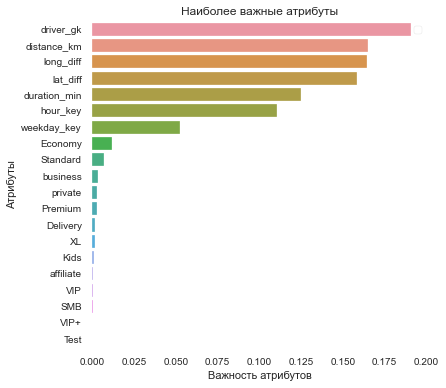

In [133]:
headers = list(X_train_22.columns.values)

feature_imp = pd.Series(model.feature_importances_,index=headers).sort_values(ascending=False)

f, ax = plt.subplots(figsize=(6, 6))
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")
plt.legend()
plt.show()

In [134]:
model_pred = model.predict(X_test_22)

print(classification_report(y_test_22, model_pred))

model.score(X_test_22, y_test_22)

              precision    recall  f1-score   support

           0       0.80      0.72      0.76     15234
           1       0.74      0.82      0.78     14766

    accuracy                           0.77     30000
   macro avg       0.77      0.77      0.77     30000
weighted avg       0.77      0.77      0.77     30000



0.7669666666666667

Можно сделать вывод из нашего анализа, о том что принимать или не принимать заказ, во многом зависит от водителя. То есть есть водители, которые часто отказыват, а есть которые нет. Следующие признак это Длина заказа и Время поездки до пассажира. Сейчас таксистам выгодны более короткие поездки.